In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,ZeroPadding2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
print(tf.__version__)

2.2.0


In [2]:
train_dir = r"C:/Users/TEJAS/Desktop/Maleria Detection/cell_images/cell_images"
test_dir =  r"C:/Users/TEJAS/Desktop/Maleria Detection/cell_images/cell_images"

In [3]:
img_width = 64
img_height = 64

In [4]:
datagen = ImageDataGenerator(rescale=1/255.0,validation_split=0.2)

In [5]:
train_data_generator = datagen.flow_from_directory(directory= train_dir,
                                                   target_size = (img_width,img_height),
                                                   class_mode = "binary",
                                                   batch_size = 16,
                                                   subset = "training"
                                                   ) 

validation_data_generator = datagen.flow_from_directory(directory= train_dir,
                                                   target_size = (img_width,img_height),
                                                   class_mode = "binary",
                                                   batch_size = 16,
                                                   subset = "validation"
                                                   )  

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [6]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1])

In [7]:
model =  Sequential()

model.add(Conv2D(16,(3,3),input_shape = (img_width,img_height,3),activation = "relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32,(3,3),activation = "relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation = "sigmoid"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [9]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [10]:
history = model.fit_generator(generator = train_data_generator,
                              steps_per_epoch =len(train_data_generator),
                              epochs = 10,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator)
                              
                              )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
1378/1378 [==============================] - 77s 56ms/step - loss: 0.5585 - accuracy: 0.7101 - val_loss: 0.3200 - val_accuracy: 0.9140
Epoch 2/10
1378/1378 [==============================] - 83s 60ms/step - loss: 0.2928 - accuracy: 0.9129 - val_loss: 0.2442 - val_accuracy: 0.9256
Epoch 3/10
1378/1378 [==============================] - 85s 62ms/step - loss: 0.2182 - accuracy: 0.9278 - val_loss: 0.2099 - val_accuracy: 0.9305
Epoch 4/10
1378/1378 [==============================] - 86s 62ms/step - loss: 0.1998 - accuracy: 0.9304 - val_loss: 0.1694 - val_accuracy: 0.9434
Epoch 5/10
1378/1378 [==============================] - 85s 62ms/step - loss: 0.1829 - accuracy: 0.9433 - val_loss: 0.1722 - val_accuracy: 0.9385
Epoch 6/10
1378/1378 [==============================] - 85s 62ms/step - loss: 0.1709 - accuracy: 0.9457 - val_loss: 0.1627 - val_accuracy: 0.9399
Epoch 7/10
1378/1378 [==========================

In [11]:
history.history

{'loss': [0.558465301990509,
  0.29278698563575745,
  0.21817348897457123,
  0.1998177170753479,
  0.18294815719127655,
  0.17094215750694275,
  0.16302931308746338,
  0.1613854467868805,
  0.15362071990966797,
  0.14489804208278656],
 'accuracy': [0.7101324200630188,
  0.9128718972206116,
  0.9277939200401306,
  0.9303791522979736,
  0.943305492401123,
  0.9456639885902405,
  0.9488388895988464,
  0.9492471218109131,
  0.9519684314727783,
  0.9530116319656372],
 'val_loss': [0.3200238049030304,
  0.24419324100017548,
  0.20985892415046692,
  0.16936251521110535,
  0.17221848666667938,
  0.1626671999692917,
  0.1610206663608551,
  0.16548587381839752,
  0.16931164264678955,
  0.16016653180122375],
 'val_accuracy': [0.9139745831489563,
  0.9255898594856262,
  0.9304900169372559,
  0.9433757066726685,
  0.938475489616394,
  0.9399273991584778,
  0.940653383731842,
  0.9339382648468018,
  0.9324864149093628,
  0.9422867298126221]}

In [12]:
def plot_learningcurve(history,epoch):
    epoch_range = range(1,epoch + 1)
    plt.plot(epoch_range,history.history["accuracy"])
    plt.plot(epoch_range,history.history["val_accuracy"])
    plt.title("Model Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Train","val"],loc = "upper_left")
    plt.show()
    

    plt.plot(epoch_range,history.history["loss"])
    plt.plot(epoch_range,history.history["val_loss"])
    plt.title("Model Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Train","val"],loc = "upper_left")
    plt.show()

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


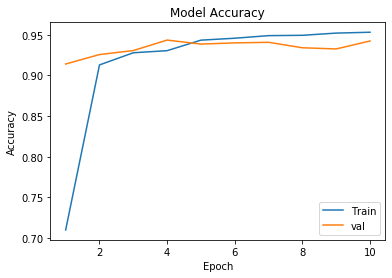

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


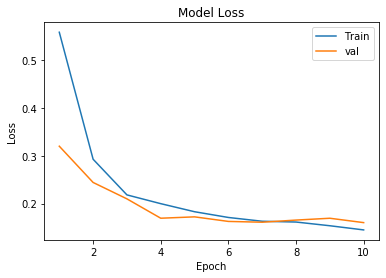

In [14]:
plot_learningcurve(history,10)

In [ ]:
model.save("maleria_final.h5")

In [17]:
model.predict(validation_data_generator)

array([[9.6030658e-01],
       [6.8809932e-01],
       [1.5950459e-06],
       ...,
       [8.8555214e-04],
       [9.8386729e-01],
       [8.6749773e-05]], dtype=float32)